In [1]:
import input_data
mnist = input_data.read_data_sets("c:/tmp/data/", one_hot=True)

Extracting c:/tmp/data/train-images-idx3-ubyte.gz
Extracting c:/tmp/data/train-labels-idx1-ubyte.gz
Extracting c:/tmp/data/t10k-images-idx3-ubyte.gz
Extracting c:/tmp/data/t10k-labels-idx1-ubyte.gz


In [2]:
xs = mnist.train.images
xs.shape

(55000, 784)

In [3]:
ys = mnist.train.labels
ys.shape

(55000, 10)

In [4]:
xs[0].shape

(784,)

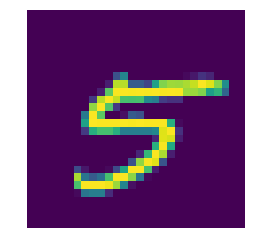

In [6]:
import matplotlib
import matplotlib.pyplot as plt

some_digit = xs[36000]
some_digit_image = some_digit.reshape(28,28)

plt.imshow(some_digit_image)
plt.axis('off')
plt.show()

In [7]:
ys[36000]

array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.])

In [9]:
mnist.test.images.shape

(10000, 784)

In [10]:
mnist.test.labels.shape

(10000, 10)

In [13]:
import numpy as np
ys1 = [np.argmax(yi) for yi in ys]

In [14]:
ys1[36000]

5

In [30]:
ys1 = np.array(ys1)

In [31]:
y_train_5 = (ys1==5)
y_train_5

array([False, False, False, ...,  True, False, False], dtype=bool)

In [32]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(xs, y_train_5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', n_iter=5, n_jobs=1,
       penalty='l2', power_t=0.5, random_state=42, shuffle=True, verbose=0,
       warm_start=False)

In [33]:
sgd_clf.predict(some_digit)

C:\Users\ThinkPad\Anaconda3\lib\site-packages\sklearn\utils\validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


array([ True], dtype=bool)

In [35]:
# 交叉验证
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, xs, y_train_5, cv=3, scoring='accuracy')

array([ 0.96280135,  0.96449026,  0.96689031])

In [36]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        pass
    def predict(self, X):
        return np.zeros((len(X), 1), dtype=bool)

In [37]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, xs, y_train_5, cv=3, scoring="accuracy")

array([ 0.91087597,  0.90814378,  0.90896198])

In [45]:
xs.shape

(55000, 784)

In [44]:
np.zeros((len(xs), 1)).shape

(55000, 1)

In [49]:
# 训练样本，严重偏斜
sum(y_train_5==True),sum(y_train_5==False)

(4987, 50013)

In [55]:
# 混淆矩阵
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, xs, y_train_5, cv=3)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred=y_train_pred, y_true=y_train_5)

array([[48993,  1020],
       [  920,  4067]])

In [57]:
confusion_matrix(y_train_5, y_train_5)

array([[50013,     0],
       [    0,  4987]])